In [2]:
import numpy as np
import matplotlib.pyplot as plt

#  2.5. Aplicando os procedimentos a STs mais desafiadoras

In [3]:
Sens = np.genfromtxt('subsfin.txt') # dados dos sensores
Locs = np.genfromtxt('mote_locs.txt') # Cordenadas dos sensores [mote id, x, y]

In [5]:
dX = np.zeros([120,52])

for k in range(0, 120):
    dX[k,:] = Sens[k*120,:]

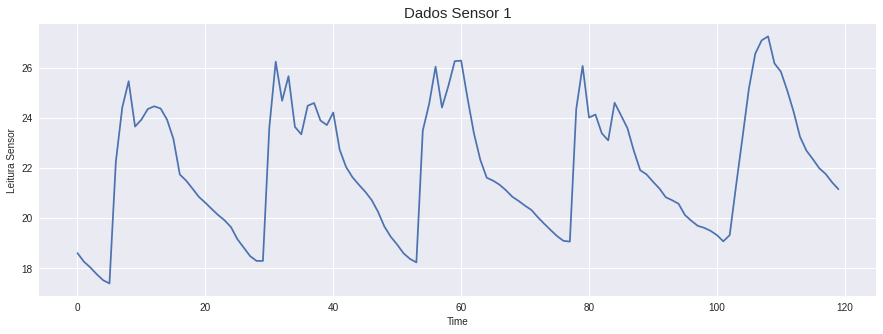

In [6]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))
plt.plot(dX[:,0])
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('Dados Sensor 1', fontsize=15)
plt.show()

## 2.1. Tratamento do ruido via alisamento exponencial simples

* Tabelas 1 e 2 (52x10) mostram o erro absoluto médio (MAE) entre a série original e a série alisada para 10 valores de $\alpha$ 
\begin{equation}
    MAE = \frac{1}{N}\sum_{i=1}^{N} |S_i - X_i|
\end{equation}

In [7]:
def MAE(list_st_lisa, list_st_normal):
    lista_erro = []
    for i in range(0, np.shape(list_st_lisa)[0]):
        soma = 0
        for j in range(0 , np.shape(list_st_lisa)[1]):

            soma += abs(list_st_lisa[i][j] - list_st_normal[:,i][j]) 
        erro = (1/len(list_st_lisa)) * soma 
        lista_erro.append(erro)

    return lista_erro

* Tratamento do ruido via alisamento exponencial simples \cite{wiki}} O objetivo deste item é implementar e entender o efeito do alisamento exponencial simples para atenuar o ruido numa série temporal. Seja $S(t)$ a versão alisada da série temporal $X(t), t = 1, ..., N$ onde $N$ é o tamanho da série. Então $S(t)$ é obtida de $X(t)$ pela equação:

\begin{equation}
   S(1) = X(1)  
\end{equation}

\begin{equation}
    S(t) = \alpha X(t) + (1 - \alpha) S(t -1), t = 2, ..., N 
\end{equation}

In [8]:
# Realizando o alizamento
alfa_valor = [0.157, 0.234, 0.345, 0.456, 0.543, 0.688, 0.734, 0.888, 0.923, 0.999]

list_st_lisa = []
lista_erro_st = []
for i in range(0, len(alfa_valor)): # percorrendo todos os valores de alfa
    
    lista_alisa = []
    
    for j in range(0, dX.shape[1]): # Percorrendo todos os sensores
        
        list_s = [] #lista criada para cada sensor
        
        list_s.append(dX[:,j][0]) # pegando primeiro valor da serie
        
        alfa = alfa_valor[i] # pegando o primeiro valor de alfa
        
        for k in range(1, len(dX[:,j])): # aplicado a formula em serie de um sensor 
            
            s =  (alfa * dX[:,j][k]) + ((1 - alfa) * list_s[k-1])
            
            list_s.append(s) # Pegando todos os valores de uma serie lisa
            
        lista_alisa.append(list_s) # Pegando todas as series lisas para um alfa
        
    list_st_lisa.append(lista_alisa) # Pegando o daset todo alisado cm um valor de alfa
    erro_st = MAE(lista_alisa, dX) # Calculando o erro MAE
    lista_erro_st.append(erro_st) # Quando os erros para da alfa
            
    

In [8]:
print(np.array(list_st_lisa).shape)
print(np.array(lista_erro_st).shape)

(10, 52, 120)
(10, 52)


In [9]:
# Salvando dos dados das tabelas
np.savetxt('resultados/2.5/2.1/erro_alisa.txt', np.array(lista_erro_st).T, fmt='%4.3f', delimiter='&')

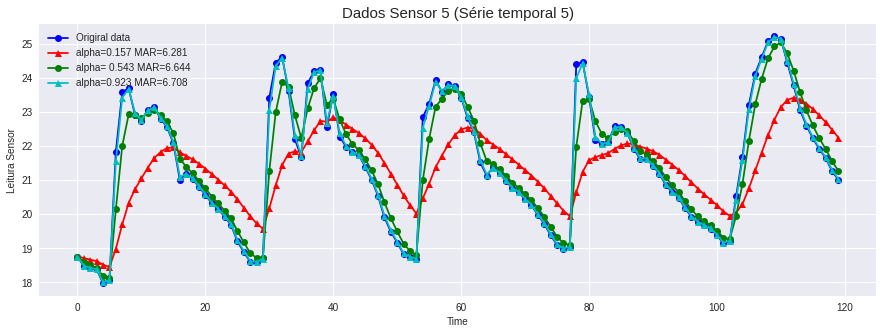

In [33]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))
plt.plot(dX[:,4],'bo-', label='Origiral data')
plt.plot(list_st_lisa[0][4],'r^-', 
         label='alpha=0.157 MAR='+str(lista_erro_st[0][4])[:5] )
plt.plot(list_st_lisa[4][4],'go-', 
         label='alpha= 0.543 MAR='+str(lista_erro_st[4][4])[:5] )
plt.plot(list_st_lisa[8][4],'c^-', 
         label='alpha=0.923 MAR='+str(lista_erro_st[8][4])[:5])
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('Dados Sensor 5 (Série temporal 5)', fontsize=15)
plt.savefig("resultados/2.5/2.1/alisa_sensor_5.png", bbox_inches='tight')
plt.show()

## 2.2. Determinação da similaridade espacial (entre séries) baseada na matriz de correlação

* Seja X a matriz de dados. As dimensões de $X$ para o dataset dado é 14400 x 52, ou seja, cada coluna de $X$ é uma série temporal. Sejam $m$ o vetor de médias e $v$ o vetor de variâncias das colunas de $X$, ou seja, as médias e as variâncias das séries temporais. As matrizes de correlação R, de covariâncias C e de coeficientes de correlação $Ro$ são dadas por:

\begin{equation}
     R_X = \frac{1}{5760} X'X = \frac{1}{5760} [ R_{ij} = \sum_{k=1}^{14400} X_{ik}X_{jk} ]
\end{equation}

\begin{equation}
    C_X = \frac{1}{5760} (X - m)'(X - m) = \frac{1}{5760} [ C_{ij} = \sum_{k=1}^{5760} (X_{ik} - m_i)(X_{jk} - m_k) ]
\end{equation}

\begin{equation}
    Ro_X = [ Ro_{ij} = \frac{C_{ij}}{\sqrt{v_iv_j}} ]
\end{equation}

In [11]:
# Separando os dados em treinamneto e teste
Xtr = dX[0:48] # treinamento
Xte = dX[48:120] # teste

In [12]:
R_x = (1/48) * np.dot(Xtr.T, Xtr)

In [13]:
R_x.shape

(52, 52)

In [14]:
R_x

array([[479.96244792, 474.30973333, 479.23474167, ..., 451.29471875,
        440.47136667, 436.14759792],
       [474.30973333, 469.14874167, 473.83971042, ..., 445.96887917,
        434.90445625, 430.46304375],
       [479.23474167, 473.83971042, 478.72420833, ..., 450.67766667,
        439.61539583, 435.1459375 ],
       ...,
       [451.29471875, 445.96887917, 450.67766667, ..., 425.96559167,
        415.226225  , 410.69810417],
       [440.47136667, 434.90445625, 439.61539583, ..., 415.226225  ,
        405.54797708, 401.56470833],
       [436.14759792, 430.46304375, 435.1459375 , ..., 410.69810417,
        401.56470833, 397.96377708]])

In [17]:
#  Calculando a matriz de covariancia de acordo com a formula
mean_x = np.mean(Xtr, axis=0)
X_central = Xtr - mean_x
C_x = (1/48) * np.dot(X_central.T, X_central)
print(mean_x.shape)
print(C_x.shape)
C_x

(52,)
(52, 52)


array([[ 6.23815412,  4.77070773,  5.56939531, ...,  6.6315125 ,
         7.68380221,  7.99420907],
       [ 4.77070773,  3.75800816,  4.35911146, ...,  5.23419167,
         5.94049141,  6.09231241],
       [ 5.56939531,  4.35911146,  5.11780208, ...,  6.06979167,
         6.8816849 ,  7.04582552],
       ...,
       [ 6.6315125 ,  5.23419167,  6.06979167, ...,  8.58069167,
         8.98844375,  8.81021042],
       [ 7.68380221,  5.94049141,  6.8816849 , ...,  8.98844375,
        10.15960794, 10.41005404],
       [ 7.99420907,  6.09231241,  7.04582552, ...,  8.81021042,
        10.41005404, 10.99750412]])

In [18]:
# Usando o numpy para calcular amtriz de covariancia
cov_x = np.cov(Xtr, rowvar=False)
print(cov_x.shape)
cov_x

(52, 52)


array([[ 6.37088081,  4.87221215,  5.68789309, ...,  6.77260851,
         7.84728737,  8.16429863],
       [ 4.87221215,  3.83796578,  4.45185851, ...,  5.34555745,
         6.06688484,  6.22193608],
       [ 5.68789309,  4.45185851,  5.22669149, ...,  6.19893617,
         7.02810372,  7.1957367 ],
       ...,
       [ 6.77260851,  5.34555745,  6.19893617, ...,  8.76325957,
         9.17968723,  8.9976617 ],
       [ 7.84728737,  6.06688484,  7.02810372, ...,  9.17968723,
        10.37576981, 10.63154455],
       [ 8.16429863,  6.22193608,  7.1957367 , ...,  8.9976617 ,
        10.63154455, 11.23149357]])

In [19]:
# Calculando o vetor de variância
v = np.var(Xtr, axis=0)
print(v.shape)
v

(52,)


array([ 6.23815412,  3.75800816,  5.11780208,  4.21076875,  3.80985139,
        4.07974514,  6.20204566,  6.62913919,  4.85530556, 11.93959683,
       14.51584722,  7.24791181,  8.81722496,  9.28319514,  6.39157708,
        7.19156037, 11.08442912, 12.53526181, 40.71046927, 31.060276  ,
       22.75065829, 30.11635586, 37.04629787, 22.03566141, 16.00007773,
       26.63544753, 19.58234787, 22.33609753, 19.57644787, 21.4376385 ,
       11.93107982,  4.8551375 ,  4.00789162,  4.6613276 ,  5.1476635 ,
        9.34424371,  5.59900764, 10.427201  , 13.95999427, 15.00150725,
        9.83976003,  9.55510139,  8.93185   ,  8.283801  ,  8.61655308,
        6.37757079,  9.02522183,  9.84320677,  8.1290069 ,  8.58069167,
       10.15960794, 10.99750412])

\begin{equation}
    Ro_X = [ Ro_{ij} = \frac{C_{ij}}{\sqrt{v_iv_j}} ]
\end{equation}

In [20]:
# Calculando a matriz de coeficente de correção 
Ro_x = []
for i in range(0, 52):
    ro = []
    for j in range(0, 52):
        ro.append(C_x[i][j] / np.sqrt(v[i] * v[j]))
    Ro_x.append(ro)

In [21]:
Ro_x = np.array(Ro_x)
print(Ro_x.shape)
Ro_x

(52, 52)


array([[1.        , 0.98531683, 0.98568524, ..., 0.9064073 , 0.96518297,
        0.96516238],
       [0.98531683, 1.        , 0.99397937, ..., 0.9217425 , 0.96140204,
        0.94766805],
       [0.98568524, 0.99397937, 1.        , ..., 0.91594816, 0.95436513,
        0.93916754],
       ...,
       [0.9064073 , 0.9217425 , 0.91594816, ..., 1.        , 0.9626865 ,
        0.90693898],
       [0.96518297, 0.96140204, 0.95436513, ..., 0.9626865 , 1.        ,
        0.984844  ],
       [0.96516238, 0.94766805, 0.93916754, ..., 0.90693898, 0.984844  ,
        1.        ]])

In [22]:
# Função para calcular a similaridade entre as series

def simSetMax3(matriz_sim):
    sim_set_max = []
    sim_set_mim = []
    
    for i in range(0, 52):
        list_max_3 = []
        list_mim_3 = []
        
       
        st = list(matriz_sim[i])
        st[i] = 0 # Não pegando os das diagonais principais
        index_max = np.argsort(st)[::-1]
        
        # As 3 mais similares
        list_max_3.append(index_max[0]+1)
        list_max_3.append(index_max[1]+1)
        list_max_3.append(index_max[2]+1)
        
        # As 3 menos similares
        list_mim_3.append(index_max[50]+1)
        list_mim_3.append(index_max[49]+1)
        list_mim_3.append(index_max[48]+1)

        sim_set_max.append(list_max_3) # Pegnado o index da series mais similaries
        sim_set_mim.append(list_mim_3) # Pegnado o index da series menos similaries

    return sim_set_max, sim_set_mim # Retorna o index das 3 series mais similares entre se
    

In [23]:
# 2 Função para calcular a similaridade entre as series
def simMax3(matriz_sim):
    
    lis_max_st = []
    for i in range(0, np.array(matriz_sim).shape[0]):
        
        list_max3 = []
        
        st = matriz_sim[i]
        
        index_max = np.argsort(st)[::-1]
        
        for k in range(0, len(index_max)):
            if index_max[k] != i:
                list_max3.append(index_max[k]+1)
            if len(list_max3) == 3:
                break
        lis_max_st.append(list_max3)
        
    return lis_max_st
        

In [24]:
sim_teste,  sim_set_mim= simSetMax3(C_x)
print(len(sim_teste))
print(sim_teste)

52
[[19, 23, 22], [23, 19, 22], [23, 19, 22], [23, 19, 22], [19, 23, 22], [19, 23, 22], [19, 23, 20], [19, 23, 20], [19, 23, 20], [19, 23, 20], [19, 23, 20], [19, 23, 20], [19, 23, 20], [19, 23, 20], [19, 23, 20], [19, 23, 20], [19, 23, 20], [19, 23, 20], [23, 20, 22], [19, 23, 22], [19, 23, 20], [19, 23, 20], [19, 20, 22], [19, 23, 22], [19, 23, 22], [19, 23, 22], [19, 23, 20], [23, 19, 22], [19, 23, 20], [19, 23, 22], [19, 23, 22], [23, 22, 19], [23, 19, 22], [23, 22, 19], [23, 19, 22], [23, 22, 19], [23, 19, 22], [23, 19, 22], [23, 19, 22], [23, 19, 22], [23, 19, 22], [19, 23, 20], [19, 23, 20], [19, 23, 20], [19, 23, 20], [23, 19, 22], [23, 19, 20], [23, 19, 22], [23, 19, 20], [23, 19, 20], [19, 23, 20], [19, 23, 20]]


In [25]:
# Um teste para conferir
test_sim_max_cx = simMax3(C_x)
print(test_sim_max_cx)

[[19, 23, 22], [23, 19, 22], [23, 19, 22], [23, 19, 22], [19, 23, 22], [19, 23, 22], [19, 23, 20], [19, 23, 20], [19, 23, 20], [19, 23, 20], [19, 23, 20], [19, 23, 20], [19, 23, 20], [19, 23, 20], [19, 23, 20], [19, 23, 20], [19, 23, 20], [19, 23, 20], [23, 20, 22], [19, 23, 22], [19, 23, 20], [19, 23, 20], [19, 20, 22], [19, 23, 22], [19, 23, 22], [19, 23, 22], [19, 23, 20], [23, 19, 22], [19, 23, 20], [19, 23, 22], [19, 23, 22], [23, 22, 19], [23, 19, 22], [23, 22, 19], [23, 19, 22], [23, 22, 19], [23, 19, 22], [23, 19, 22], [23, 19, 22], [23, 19, 22], [23, 19, 22], [19, 23, 20], [19, 23, 20], [19, 23, 20], [19, 23, 20], [23, 19, 22], [23, 19, 20], [23, 19, 22], [23, 19, 20], [23, 19, 20], [19, 23, 20], [19, 23, 20]]


In [34]:
# Calculando as 3 seriés mais limilares entre se usando o C_x
sim_max_cx, sim_mim_cx = simSetMax3(C_x)
# Salvando dos dados das tabelas
np.savetxt('resultados/2.5/2.2/sim_max_cx.txt', np.array(sim_max_cx), fmt='%4.f', delimiter='&')
np.savetxt('resultados/2.5/2.2/sim_mim_cx.txt', np.array(sim_mim_cx), fmt='%4.f', delimiter='&')
print(sim_max_cx[24])
print(sim_mim_cx[24])

[19, 23, 22]
[33, 34, 46]


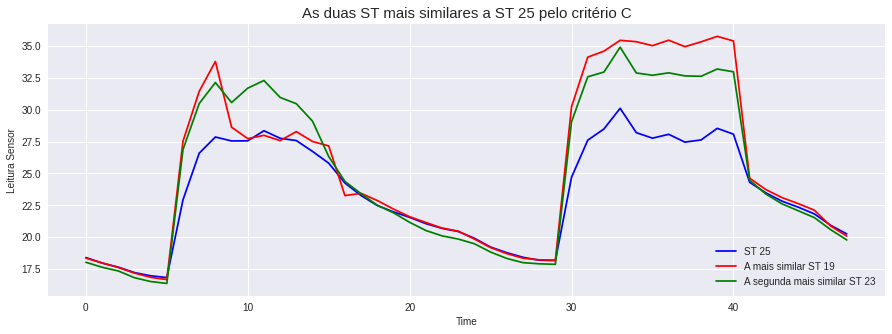

In [35]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))
plt.plot(Xtr[:,24][:],'b', label='ST 25')
plt.plot(Xtr[:,18][:],'r', 
         label='A mais similar ST 19')
plt.plot(Xtr[:,22][:],'g', 
         label='A segunda mais similar ST 23')
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('As duas ST mais similares a ST 25 pelo critério C', fontsize=15)
plt.savefig("resultados/2.5/2.2/sim_c_max.png", bbox_inches='tight')
plt.show()

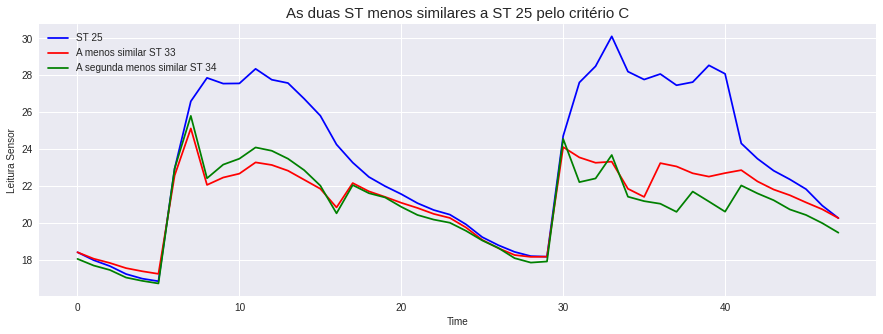

In [36]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))
plt.plot(Xtr[:,24][:],'b', label='ST 25')
plt.plot(Xtr[:,32][:],'r', 
         label='A menos similar ST 33')
plt.plot(Xtr[:,33][:],'g', 
         label='A segunda menos similar ST 34')
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('As duas ST menos similares a ST 25 pelo critério C', fontsize=15)
plt.savefig("resultados/2.5/2.2/sim_c_mim.png", bbox_inches='tight')
plt.show()

In [38]:
# Calculando as 3 seriés mais limilares entre se usando o R_x
sim_max_rx, sim_mim_rx = simSetMax3(R_x)
# Salvando os dados das tabelas
np.savetxt('resultados/2.5/2.2/sim_max_rx.txt', np.array(sim_max_rx), fmt='%4.f', delimiter='&')
np.savetxt('resultados/2.5/2.2/sim_mim_rx.txt', np.array(sim_mim_rx), fmt='%4.f', delimiter='&')
print(sim_max_rx[40])
print(sim_mim_rx[40])

[19, 23, 20]
[48, 52, 51]


In [37]:
# Calculando as 3 seriés mais limilares entre se usando o Ro_x
sim_max_rox, sim_mim_rox = simSetMax3(Ro_x)
np.savetxt('resultados/2.5/2.2/sim_max_rox.txt', np.array(sim_max_rox), fmt='%4.f', delimiter='&')
np.savetxt('resultados/2.5/2.2/sim_mim_rox.txt', np.array(sim_mim_rox), fmt='%4.f', delimiter='&')
print(sim_max_rox[4])
print(sim_mim_rox[4])

[6, 9, 2]
[45, 47, 48]


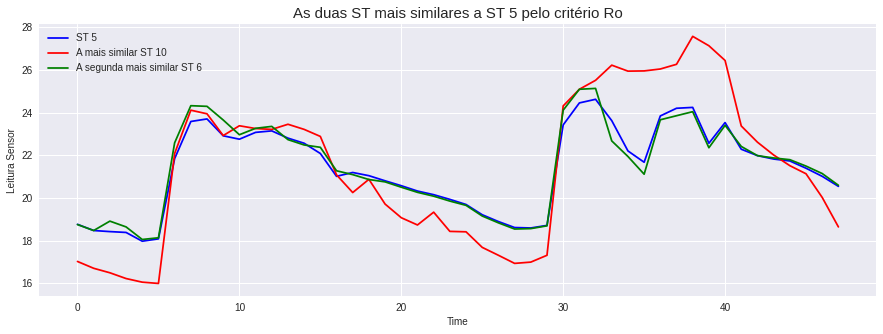

In [39]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))
plt.plot(Xtr[:,4][:],'b', label='ST 5')
plt.plot(Xtr[:,9][:],'r', 
         label='A mais similar ST 10')
plt.plot(Xtr[:,5][:],'g', 
         label='A segunda mais similar ST 6')
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('As duas ST mais similares a ST 5 pelo critério Ro', fontsize=15)
plt.savefig("resultados/2.5/2.2/sim_ro_max.png", bbox_inches='tight')
plt.show()

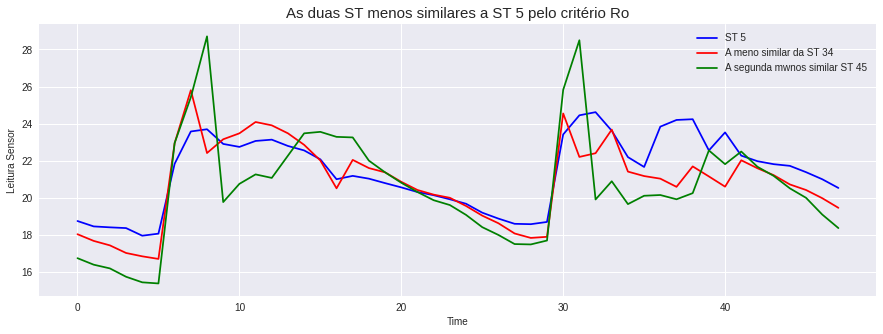

In [40]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))
plt.plot(Xtr[:,4][:],'b', label='ST 5')
plt.plot(Xtr[:,33][:],'r', 
         label='A meno similar da ST 34')
plt.plot(Xtr[:,44][:],'g', 
         label='A segunda mwnos similar ST 45')
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('As duas ST menos similares a ST 5 pelo critério Ro', fontsize=15)
plt.savefig("resultados/2.5/2.2/sim_ro_mim.png", bbox_inches='tight')
plt.show()

## 2.3.1. Imputação com estimação espacial

Na Seção 2.2 foi obtida a lista das três STs mais correlacionadas com cada uma das séries. De forma genérica, sejam  ́$st_{.,u}, st_{.,v} e st_{.,w}$ as STs com maior correlação com $st_{.,i}$. Então forme a matriz $Xtr_i = [st_{.,i}, st_{.,u}, st_{.,v}, st_{.,w}]$, ou seja, as STs são as colunas de $Xtr_i$. Pelo método da subseção 2.2 obtenha $m_i$, o vetor de médias, e $C_{X_i}, i = 1, ..., M$, a matriz de covariâncias. Selecione aleatoriamente 10\% dos pontos em cada ST do conjunto de teste Xte como pontos ausentes e aplique o Teorema 12.7 para estimar os valores nestes pontos. Construa uma tabela do MAE para os pontos de teste ausentes comparando esta técnica de estimação espacial com as imputações pela média e pela repetiçãoo do ultimo valor recebido. Inclua no relatório tabelas, figuras, códigos e discussão no modelo fornecido para as Seções 2.1 e 2.2.

* Usando o criterio de similaridade $Ro$

In [41]:
# Xte  Dados de teste
# Xtr  Dados de treinamneto 
# As três mais similares usando o Ro sim_max_rox 
# As três mais similares usando o C sim_max_cx 
# As três mais similares usando o R sim_max_rx 


# Função para encontrar a matriz Xtr_i item 2.3.1
def StMax3(Xtr,list_max_sim):
    
    Xtr_i = []
    # Percorrendo as 52 series temporais
    for i in range(0, Xtr.shape[1]):
        # Pegando as 3 mais similares de cada uma das 52 series
        max_st3 = list_max_sim[i]
        # Aqui vai as 4 series temporais [st.,i, st.,u, st.,v, st.,w]
        list_st_sim = []
        # Pgando a serie st.,i
        list_st_sim.append(Xtr[:,i])
        
        # Pegando as series st.,u, st.,v, st.,w
        for j in range(0, len(max_st3)):
            list_st_sim.append(Xtr[:,max_st3[j]-1])
        # Junatdo as lista Xtr_i
        Xtr_i.append(list_st_sim)
    
    return np.array(Xtr_i)
    

In [42]:
# Criado a matrizes Xtr_i com as três mais similares usando o Ro sim_max_rox 
mat_Xtr_i_Ro = StMax3(Xtr, sim_max_rox)
print(mat_Xtr_i_Ro.shape)
print(mat_Xtr_i_Ro[0].shape)

(52, 4, 48)
(4, 48)


In [43]:
print(mat_Xtr_i_Ro[0])

[[18.61 18.27 18.04 17.77 17.53 17.4  22.26 24.42 25.47 23.66 23.94 24.36
  24.47 24.38 23.94 23.17 21.75 21.5  21.18 20.85 20.62 20.37 20.13 19.92
  19.65 19.17 18.83 18.49 18.3  18.3  23.62 26.25 24.69 25.67 23.65 23.35
  24.49 24.6  23.9  23.72 24.22 22.74 22.05 21.64 21.34 21.06 20.73 20.26]
 [18.82 18.53 18.37 18.12 17.76 17.68 22.84 24.83 25.13 24.32 23.79 24.14
  24.12 23.83 23.5  23.13 21.74 21.7  21.41 21.08 20.75 20.5  20.26 20.11
  19.91 19.42 19.02 18.72 18.52 18.56 24.2  25.58 25.53 24.09 23.1  22.72
  23.97 23.7  23.11 23.19 23.53 22.58 22.22 21.82 21.66 21.41 21.05 20.53]
 [19.04 18.73 18.51 18.28 18.04 17.91 22.03 23.94 24.48 23.66 23.04 23.46
  23.53 23.51 23.23 22.59 21.54 21.58 21.51 21.26 20.97 20.67 20.39 20.2
  19.93 19.45 19.12 18.83 18.75 18.74 23.42 24.82 24.36 23.89 22.79 22.17
  23.31 23.2  23.14 22.53 22.93 22.66 22.34 21.95 21.81 21.44 21.12 20.7 ]
 [18.41 17.98 17.66 17.23 16.98 16.84 22.94 26.59 27.86 27.55 27.56 28.35
  27.76 27.58 26.73 25.81 24.25 23.2

In [44]:
print(mat_Xtr_i_Ro[1])

[[19.04 18.73 18.51 18.28 18.04 17.91 22.03 23.94 24.48 23.66 23.04 23.46
  23.53 23.51 23.23 22.59 21.54 21.58 21.51 21.26 20.97 20.67 20.39 20.2
  19.93 19.45 19.12 18.83 18.75 18.74 23.42 24.82 24.36 23.89 22.79 22.17
  23.31 23.2  23.14 22.53 22.93 22.66 22.34 21.95 21.81 21.44 21.12 20.7 ]
 [18.82 18.53 18.37 18.12 17.76 17.68 22.84 24.83 25.13 24.32 23.79 24.14
  24.12 23.83 23.5  23.13 21.74 21.7  21.41 21.08 20.75 20.5  20.26 20.11
  19.91 19.42 19.02 18.72 18.52 18.56 24.2  25.58 25.53 24.09 23.1  22.72
  23.97 23.7  23.11 23.19 23.53 22.58 22.22 21.82 21.66 21.41 21.05 20.53]
 [18.61 18.27 18.04 17.77 17.53 17.4  22.26 24.42 25.47 23.66 23.94 24.36
  24.47 24.38 23.94 23.17 21.75 21.5  21.18 20.85 20.62 20.37 20.13 19.92
  19.65 19.17 18.83 18.49 18.3  18.3  23.62 26.25 24.69 25.67 23.65 23.35
  24.49 24.6  23.9  23.72 24.22 22.74 22.05 21.64 21.34 21.06 20.73 20.26]
 [18.76 18.47 18.42 18.38 17.97 18.08 21.84 23.58 23.7  22.91 22.75 23.07
  23.14 22.8  22.56 22.08 21.01 21.1

In [45]:
# Função para obter o vetor m_i e matriz Cx_i
def meanCxM(Xtr_i):
    list_Cx_i = []
    list_mi = []
    for i in range(0, 52):
        Str_i =  Xtr_i[i].T # Transformando para [5760, 4]
        # Encontrado o vetor m_i da Xtr_i
        m_i = np.mean(Str_i, axis=0)
        # Criando a matriz Cx_i
        Str_i_central = Str_i - m_i
        Cx_i = (1/5760) * np.dot(Str_i_central.T, Str_i_central)
        # juntando matriz com todos os Cx_i
        list_Cx_i.append(Cx_i)
        list_mi.append(m_i)
        
    return  np.array(list_Cx_i), np.array(list_mi) # Retorna matriz com todos os Cx_i e m_i
    

In [46]:
list_Cx_i_Ro, list_mi = meanCxM(mat_Xtr_i_Ro)
print(list_Cx_i_Ro.shape)

(52, 4, 4)


In [47]:
list_Cx_i_Ro[0]

array([[0.05198462, 0.04641163, 0.0397559 , 0.08135203],
       [0.04641163, 0.04264835, 0.03632593, 0.0717936 ],
       [0.0397559 , 0.03632593, 0.03131673, 0.06130989],
       [0.08135203, 0.0717936 , 0.06130989, 0.13333398]])

In [48]:
list_Cx_i_Ro[1]

array([[0.03131673, 0.03632593, 0.0397559 , 0.03092802],
       [0.03632593, 0.04264835, 0.04641163, 0.03595222],
       [0.0397559 , 0.04641163, 0.05198462, 0.03963293],
       [0.03092802, 0.03595222, 0.03963293, 0.03174876]])

In [49]:
list_Cx_i_Ro[51]

array([[0.09164587, 0.08675045, 0.1024247 , 0.08948716],
       [0.08675045, 0.0846634 , 0.09542921, 0.08594384],
       [0.1024247 , 0.09542921, 0.12096539, 0.10146474],
       [0.08948716, 0.08594384, 0.10146474, 0.09237024]])

### Aplicando o teorema 12.7

\begin{equation}
    \hat{X} = a'Y+b
\end{equation}

\begin{equation}
    Y = [X_1, X_2,X_3]
\end{equation}

\begin{equation}
    a' = C_{X,Y}C_{Y}^{-1}
\end{equation}

\begin{equation}
    b = E[X]-C_{X,Y}C_{Y}^{-1}E[Y] = E[X] - a'E[Y]
\end{equation}


In [50]:
def estimaLinear(mat_cov, mat_m):
    estima_x = []
    for i in range(0, 52): 
        # Encontrado a o valor esperado E[Y] (Media)
        E_Y = mat_m[i][1:]
        # Encontrado a matriz de covariancia de CY em C_X
        C_Y = mat_cov[i].copy()
        C_Y =  np.delete(C_Y, [0], axis=0) # removendo a linha de i
        C_Y =  np.delete(C_Y, [0], axis=1) # removendo a coluna de i
        C_x_y = mat_cov[i][1:,0] # matriz cruzada
        # Calculando o coeficiente a'
        a = np.dot(C_x_y, np.linalg.inv(C_Y))
        # Calculando o coeficente b
        b = mat_m[i][0] - np.dot(a.T, E_Y)
        
        estima_x.append([a, b])
    # Retorna os coefientes  de estimativa (a, b) de cada serie
    return estima_x
    

In [51]:
# Funcao para simular os 10% dos dados faltosos
def imputaData(data_test):
    # pegando os 10% de teste
    n = 0.10 * data_test.shape[0]
    rng = np.random.default_rng()
    list_index = []
    for i in range(0, 52):
        # Pegando 10% dos index de forma aleatoria de todas as series 
        indexs = rng.choice(range(4, data_test.shape[0]), size=(int(n)), replace=False)
        list_index.append(list(indexs))
    # Retorna as posicao das imputacao
    return list_index

In [52]:
# Estimação espacial
def estimaVal(coe_estima, posi_imput, index_sim_max3, dados_test):
    dados_test = dados_test.T # Transformnado para de 5760x52 para 52x5760
    novos_dados = dados_test.copy()
    for i in range(0, 52):
        a = coe_estima[i][0] # Coeficiente a 1x3 da serie i
        b = coe_estima[i][1] # Coeficiente b 1x1 ca serie i
        # Estimar todos os dados imputados da serie i
        for j in posi_imput[i]:
            Y = []
            Y.append(dados_test[index_sim_max3[i][0]-1][j])
            Y.append(dados_test[index_sim_max3[i][1]-1][j])
            Y.append(dados_test[index_sim_max3[i][2]-1][j])
            # Estimando o valor cm os coeficentes da serie i
            X_i = np.dot(a.T, Y) + b
            # Substituido os dados pela estimativa 
            novos_dados[i][j] = X_i
    # Retornando os dados de teste com os valores imputados substituidos        
    return novos_dados

In [53]:
# Calculando os coeficientes ('a, b) para todas as series
coe_estima_x = estimaLinear(list_Cx_i_Ro, list_mi)

In [54]:
# Estimando os novos dados de testes
index_data_imput = imputaData(Xte) # Simulando a falta de dados
esti_dados_test = estimaVal(coe_estima_x, index_data_imput, sim_max_rox, Xte)

In [55]:
# Calculando o erro 
erro_estima = MAE(esti_dados_test, Xte)
print(erro_estima)

[0.029637452830759012, 0.01605121782511525, 0.03544553165825476, 0.026000927209519017, 0.015295235143469883, 0.025367342572983523, 0.03309972053504714, 0.022493842139764363, 0.02648758079253034, 0.03585597382492746, 0.07321529692714303, 0.0655578646096496, 0.05396297989315023, 0.03884104862732325, 0.04671953579881331, 0.04121703036856239, 0.07855904493641834, 0.0442402114506119, 0.03732246978187519, 0.07169582697832158, 0.06438310500955588, 0.06609198395478724, 0.08310222778052118, 0.037830838800616245, 0.0403899816931456, 0.05537634003462119, 0.02033720602244247, 0.022055400016972235, 0.01725731629689547, 0.07548128316010416, 0.059563659815022874, 0.028108223568668524, 0.048543292817620855, 0.052053667397953425, 0.040428665612253056, 0.05347637666416632, 0.0352140699954152, 0.06089273841873766, 0.08147550814291878, 0.05448197831237887, 0.04134386879888611, 0.07235170133277688, 0.046748471667314724, 0.04567777244460019, 0.04615790473794051, 0.023119804215430518, 0.03725532338205352, 0.

In [57]:
sum(erro_estima)/52

0.045952249280504426

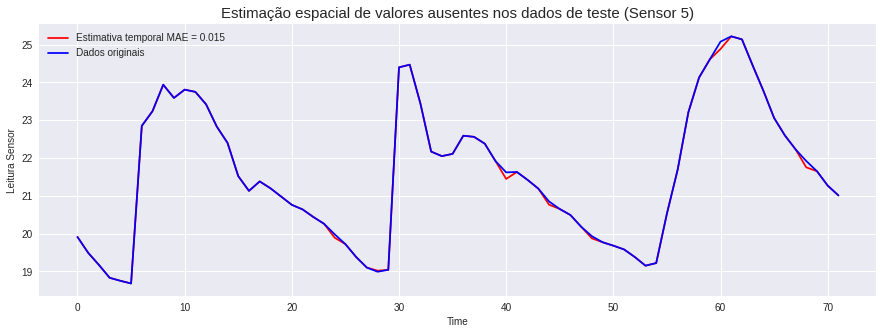

In [59]:
# Serie normal
plt.figure(figsize=(15,5))
plt.plot(esti_dados_test[4], 'r', 
         label='Estimativa temporal MAE = '+str(erro_estima[4])[:5])
plt.plot(Xte[0:,4],'b', label='Dados originais')
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.legend()
plt.title('Estimação espacial de valores ausentes nos dados de teste (Sensor 5)', fontsize=15)
plt.savefig("resultados/2.5/2.3/estima_espacial.png", bbox_inches='tight')
plt.show()

In [60]:
# Estimativa por media dos dados de treinamento
# Estimativa por valor anterio
def estiMean(dados_test, index_imput, vetor_medias):
    dodos_esti_mean = dados_test.T.copy()
    dodos_esti_valor = dados_test.T.copy()
    for i in range(0, 52):
        st_index = sorted(index_imput[i])
        for j in st_index:
            # Substituindo os dados pela media
            dodos_esti_mean[i][j] = vetor_medias[i][0]
            # Substituindo pelo valor anterior
            dodos_esti_valor[i][j] = dodos_esti_valor[i][j-1]
    return dodos_esti_valor, dodos_esti_mean

In [61]:
esti_val_anterior, esti_media = estiMean(Xte, index_data_imput, list_mi)

In [62]:
# Calculando o erro da media
erro_est_media = MAE(esti_media, Xte)
print(erro_est_media)

[0.1806770833333334, 0.23952724358974356, 0.21399038461538458, 0.16899038461538438, 0.19714743589743602, 0.14091346153846163, 0.29616185897435887, 0.27289663461538466, 0.22339743589743571, 0.2250600961538461, 0.2130448717948718, 0.09088141025641028, 0.22546874999999986, 0.27847756410256413, 0.17254807692307672, 0.22634214743589737, 0.28453124999999996, 0.3999198717948718, 0.676610576923077, 0.4286738782051283, 0.5107411858974358, 0.4882572115384615, 0.5188501602564102, 0.5220392628205129, 0.2980408653846154, 0.46383413461538453, 0.5423197115384616, 0.30234375000000024, 0.519803685897436, 0.642015224358974, 0.3919831730769231, 0.4407692307692308, 0.11989983974358967, 0.2982932692307692, 0.353505608974359, 0.42941907051282063, 0.32616987179487184, 0.15399439102564097, 0.4658413461538461, 0.3565745192307692, 0.420204326923077, 0.2932692307692307, 0.4423076923076927, 0.2328245192307693, 0.356806891025641, 0.1448597756410257, 0.3742908653846153, 0.1745432692307694, 0.12366586538461544, 0.19

In [65]:
sum(erro_est_media)/52

0.31768760786489153

In [63]:
# Calculando o erro com a substituicao com o valor anterior
erro_est_val = MAE(esti_val_anterior, Xte)
print(erro_est_val)

[0.1938461538461539, 0.06076923076923078, 0.08192307692307682, 0.09846153846153849, 0.03961538461538466, 0.05192307692307698, 0.06442307692307689, 0.040769230769230724, 0.11980769230769232, 0.06480769230769233, 0.10365384615384603, 0.031153846153846105, 0.07192307692307696, 0.06865384615384616, 0.06750000000000003, 0.11730769230769234, 0.5292307692307693, 0.10211538461538473, 0.05076923076923085, 0.29153846153846164, 0.07923076923076912, 0.1234615384615385, 0.21519230769230774, 0.09596153846153836, 0.20403846153846147, 0.3625, 0.14480769230769228, 0.19557692307692306, 0.11711538461538476, 0.40076923076923066, 0.10288461538461528, 0.1376923076923077, 0.12634615384615386, 0.1715384615384615, 0.05923076923076934, 0.18288461538461542, 0.1059615384615385, 0.32057692307692315, 0.1971153846153845, 0.12326923076923078, 0.05961538461538451, 0.11057692307692309, 0.11134615384615397, 0.20692307692307682, 0.2855769230769231, 0.07942307692307697, 0.26250000000000007, 0.30711538461538457, 0.15461538

In [64]:
sum(erro_est_val)/52

0.14502958579881656

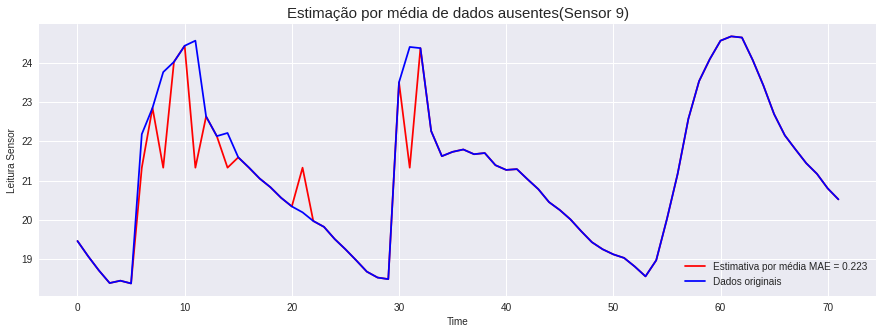

In [66]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))
plt.plot(esti_media[8],'r', 
         label='Estimativa por média MAE = '+str(erro_est_media[8])[:5])
plt.plot(Xte[0:,8],'b', label='Dados originais')
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('Estimação por média de dados ausentes(Sensor 9)', fontsize=15)
plt.savefig("resultados/2.5/2.3/estima_media.png", bbox_inches='tight')
plt.show()

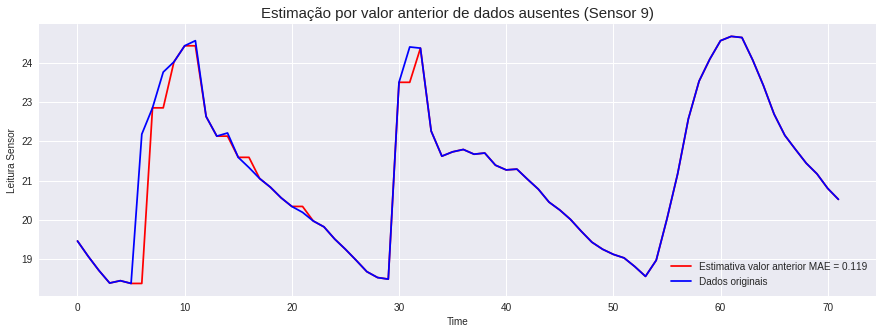

In [67]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))
plt.plot(esti_val_anterior[8],color='r', 
         label='Estimativa valor anterior MAE = '+str(erro_est_val[8])[:5])
plt.plot(Xte[0:,8],'b', label='Dados originais')
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('Estimação por valor anterior de dados ausentes (Sensor 9)', fontsize=15)
plt.savefig("resultados/2.5/2.3/estima_media.png", bbox_inches='tight')
plt.show()

### 2.3.2. Imputação com estimação temporal
Na imputação com estimação temporal, repete-se o mesmo procedimento da subseção 2.3.1 sendo a diferença em como $Xtr_i$ é obtida. Neste caso, $Xtr_i$ e formada por $st_{i,.}$ e
versães de $st_{i,.}$ atrasadas no tempo, ou seja, $Xtr_j = [st_{i,j} , st_{i−1,j} , st_{i−2,j} , st_{i−3,j} ]$. Todo orestante do procedimento é o mesmo da subseção 2.3.1.

In [68]:

# Realizando o atraso nas series (Xtrj)
Xtrj = []
for j in range(0, 52): # As 52 series
    stj = Xtr[:,j]
    st_atra_3 = []
    st_atra_3.append(stj)
    # Os tres valores de atraso
    for k in range(1, 4): #  k = 1, 2, 3
        stj_atra = []
        # 0 a 5760, percorrendo todos os valores da serie
        for i in range(0, stj.shape[0]):
            stj_atra.append(stj[i-k])
        # Pegando a serie atrasada com -1, -2, -3
        st_atra_3.append(stj_atra)
    # Adicionando a serie j e as tres atrasadas
    Xtrj.append(st_atra_3)
            

In [69]:
np.array(Xtrj).shape

(52, 4, 48)

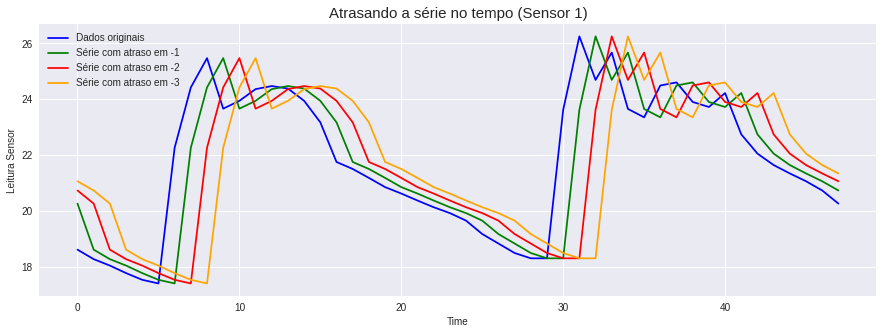

In [70]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))
plt.plot(Xtrj[0][0],'b', label='Dados originais')
plt.plot(Xtrj[0][1],'g', 
         label='Série com atraso em -1')
plt.plot(Xtrj[0][2],'r', 
         label='Série com atraso em -2')

plt.plot(Xtrj[0][3],color='orange', 
         label='Série com atraso em -3')
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('Atrasando a série no tempo (Sensor 1)', fontsize=15)
plt.savefig("resultados/2.5/2.3/atrso_temp01.png", bbox_inches='tight')
plt.show()

In [71]:
# Criando as matrizes de covariancia da estimacao temporal
Xtrj = np.array(Xtrj)
list_Cx_j_Ro, list_mj = meanCxM(Xtrj)

In [72]:
list_Cx_j_Ro[0]

array([[0.05198462, 0.04434207, 0.03288241, 0.02205391],
       [0.04434207, 0.05198462, 0.04434207, 0.03288241],
       [0.03288241, 0.04434207, 0.05198462, 0.04434207],
       [0.02205391, 0.03288241, 0.04434207, 0.05198462]])

In [73]:
# Colculando os coeficientes ('a, b) para todas as series atrasadas 
coe_estima_xj = estimaLinear(list_Cx_j_Ro, list_mj)

In [74]:
# Estimendo os valores amputados (Estimação temporal)
def estTem(coe_estima, dados_test, posi_imput):
    novos_dados = dados_test.T.copy()
    dados_test = dados_test.T
    for i in range(0, 52):
        a = coe_estima[i][0] # Coeficiente a 1x3 da serie i
        b = coe_estima[i][1] # Coeficiente b 1x1 ca serie i
        index_imput = sorted(posi_imput[i]) # Os index de onde foram imputados os dados da serie i
        # Estimar todos os dados imputados da serie i
        for j in index_imput:
            Y = []
            Y.append(dados_test[i][j-1])
            Y.append(dados_test[i][j-2])
            Y.append(dados_test[i][j-3])
            # Estimando o valor cm os coeficentes da serie i
            X_i = np.dot(a.T, Y) + b
            # Substituido os dados faltosos pela estimativa 
            novos_dados[i][j] = X_i
    # Retornando os dados de teste com os valores imputados substituidos        
    return novos_dados

In [75]:
# Estimando os novos dados de testes (estimacao temporal)
est_temp_dados_test = estTem(coe_estima_xj, Xte, index_data_imput)

In [76]:
# Calculando o erro com a estimacao temporal
erro_est_temp = MAE(est_temp_dados_test, Xte)
print(erro_est_temp)

[0.16928748467597451, 0.06704725684762691, 0.05565575364667457, 0.0907151729001866, 0.053831551532681016, 0.0750690038039076, 0.07988908715357468, 0.06426905061217723, 0.10803790929389029, 0.07215799745900443, 0.09684975244096876, 0.03894840899869708, 0.06790897338982291, 0.13621514159431009, 0.07690054984175802, 0.0947030603516915, 0.15393635112939968, 0.13439956155262828, 0.12849580401174834, 0.30119810965397803, 0.11767573917743057, 0.12409201579354237, 0.12929766611385032, 0.12597786609562708, 0.1515679156400896, 0.1663756087400224, 0.1118644235012645, 0.10945920596233437, 0.05479853019443472, 0.171884965965477, 0.10028941357018645, 0.1532143043935721, 0.08221444903824308, 0.16065351606257833, 0.0814639021542312, 0.1784016239265521, 0.08349740045977554, 0.24052948176892333, 0.20536042709492658, 0.16761347530719056, 0.11115685298724506, 0.11792930393712112, 0.20274926971914717, 0.20085557442640203, 0.27737689986488145, 0.06453724596321639, 0.3857415327862067, 0.21700291740112027, 0.

In [77]:
sum(erro_est_temp)/52

0.1290182085835769

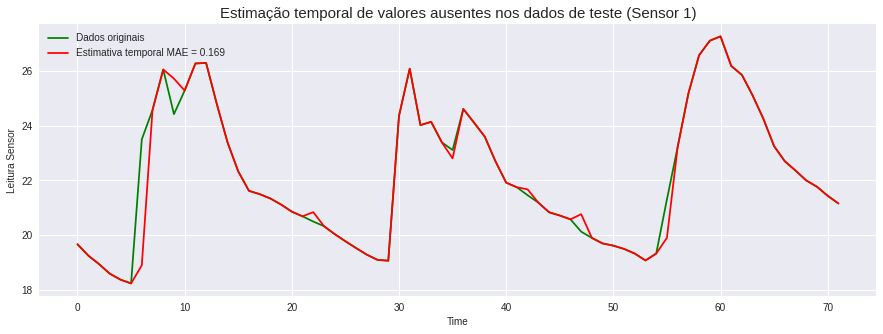

In [79]:
plt.style.use('seaborn')
plt.figure(figsize=(15,5))
plt.plot(Xte[0:,0],'g', label='Dados originais')
plt.plot(est_temp_dados_test[0],'r', 
         label='Estimativa temporal MAE = '+str(erro_est_temp[0])[:5])
plt.legend()
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.title('Estimação temporal de valores ausentes nos dados de teste (Sensor 1)', fontsize=15)
plt.savefig("resultados/2.5/2.3/estima_temp.png", bbox_inches='tight')
plt.show()

### 2.3.2. Imputação com estimação espaço-temporal
Na imputação com estimação temporal, repete-se o mesmo procedimento da subseção 2.3.1 sendo a diferença em como $Xtr_j$ é obtida. Neste caso, $Xtr_i$ e formada por $st_{j,.}$ e
versães de $st_{j,.}$ atrasadas no tempo, em parelhadas com $st_{.,u}, st_{.,v}, st_{.,w} $, ou seja,   $Xtr_{ij} = [st_{i,j} , st_{i−1,j} , st_{i−2,j} , st_{i−3,j}, st_{i,u}, st_{i,v}, st_{i,w} ]$. Todo orestante do procedimento é o mesmo da subseção 2.3.1.

In [64]:
# Emparelhando as series em uma matriz 
#st_{i,j} , st_{i−1,j} , st_{i−2,j} , st_{i−3,j}, st_{i,u}, st_{i,v}, st_{i,w}

In [80]:
#Xtrj  Series atrazadas no tempo
#mat_Xtr_i_Ro  Series mais similares 
Xtri = mat_Xtr_i_Ro

list_Cx_ji = []

for i in range(0, 52):
    list_Cx_ji7 = []
    list_Cx_ji7.append(mat_Xtr_i_Ro[i][0])
    
    for j in range(1, 4): # j = 1, 2, 3
        list_Cx_ji7.append(mat_Xtr_i_Ro[i][j])
    
    for l in range(1, 4): # j = 1, 2, 3
        list_Cx_ji7.append(Xtrj[i][l])
    
    list_Cx_ji.append(list_Cx_ji7) # (52, 7, 5760)
        

In [81]:
list_Cx_ji = np.array(list_Cx_ji)
list_Cx_ji.shape

(52, 7, 48)

In [82]:
# Criando as matrizes de covariancia da estimacao espaco-temporal
list_Cx_ij_Ro, list_mij = meanCxM(list_Cx_ji)
list_Cx_ij_Ro.shape

(52, 7, 7)

In [83]:
list_Cx_ij_Ro[0]

array([[0.05198462, 0.04641163, 0.0397559 , 0.08135203, 0.04434207,
        0.03288241, 0.02205391],
       [0.04641163, 0.04264835, 0.03632593, 0.0717936 , 0.03879359,
        0.02722586, 0.01675699],
       [0.0397559 , 0.03632593, 0.03131673, 0.06130989, 0.03407388,
        0.02461156, 0.01591876],
       [0.08135203, 0.0717936 , 0.06130989, 0.13333398, 0.0747348 ,
        0.06130394, 0.04441418],
       [0.04434207, 0.03879359, 0.03407388, 0.0747348 , 0.05198462,
        0.04434207, 0.03288241],
       [0.03288241, 0.02722586, 0.02461156, 0.06130394, 0.04434207,
        0.05198462, 0.04434207],
       [0.02205391, 0.01675699, 0.01591876, 0.04441418, 0.03288241,
        0.04434207, 0.05198462]])

In [84]:
# Estimendo os valores amputados
def estEspTem(coe_estima, posi_imput, index_sim_max3, dados_test):
    dados_test = dados_test.T # Transformnado para de 5760x52 para 52x5760
    novos_dados = dados_test.copy()
    for i in range(0, 52):
        
        a = coe_estima[i][0] # Coeficiente a 1x3 da serie i
        b = coe_estima[i][1] # Coeficiente b 1x1 ca serie i
        index_imput = sorted(posi_imput[i]) 
        # Estimar todos os dados imputados da serie i
        for j in posi_imput[i]:
            Y = []
            # Pegando os valores das similares
            Y.append(dados_test[index_sim_max3[i][0]-1][j])
            Y.append(dados_test[index_sim_max3[i][1]-1][j])
            Y.append(dados_test[index_sim_max3[i][2]-1][j])
            # Pegando os valores atrazados
            Y.append(dados_test[i][j-1])
            Y.append(dados_test[i][j-2])
            Y.append(dados_test[i][j-3])
            # Estimando o valor cm os coeficentes da serie i
            X_i = np.dot(a.T, Y) + b
            # Substituido os dados faltosos pela estimativa 
            novos_dados[i][j] = X_i
    # Retornando os dados de teste com os valores imputados substituidos        
    return novos_dados

In [85]:
# Colculando os coeficientes ('a, b) para todas as series 
coe_estima_xij = estimaLinear(list_Cx_ij_Ro, list_mij)
# Estimando os novos dados de testes (estimacao temporal)
est_esp_temp_dados = estEspTem(coe_estima_xij, index_data_imput, sim_max_rox, Xte)

In [86]:
# Calculando o erro com a estimacao temporal
erro_est_esp_temp = MAE(est_esp_temp_dados, Xte)
print(erro_est_esp_temp)

[0.04700812884708344, 0.01563597767351469, 0.04148469321509337, 0.021250098931794047, 0.013847135541430758, 0.029725381685190396, 0.032510138098397666, 0.025801778336215785, 0.018557654551415705, 0.03342819675513116, 0.06734971511002491, 0.05246747477542845, 0.05300356896593367, 0.04295937228164608, 0.04100856898158703, 0.024615732457632156, 0.04869254121542546, 0.03940811357245847, 0.0418390127315458, 0.04886027468463908, 0.057186156740095175, 0.08747001258900354, 0.07588526887433854, 0.03265911702326374, 0.04648329241872787, 0.046386694707797244, 0.022913608287045723, 0.025313672231503253, 0.016883623899168823, 0.06775714101804697, 0.07515987988718165, 0.056040932271131105, 0.04811161194185041, 0.05621833221224457, 0.04619252191957045, 0.05447587809447309, 0.028300643500347823, 0.05442139782658045, 0.05502223622773405, 0.057563518798068265, 0.03314595264175085, 0.06541425814247934, 0.029166290494466254, 0.040253568061425805, 0.03847174862317052, 0.021109494448151255, 0.03451830938630

In [87]:
sum(erro_est_esp_temp)/52

0.043448451327146684

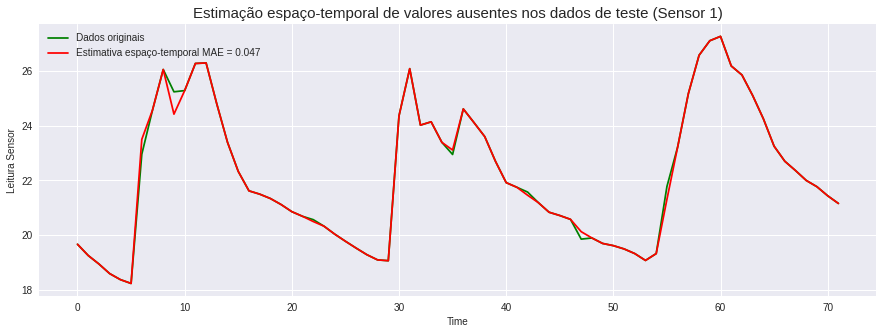

In [88]:
plt.figure(figsize=(15,5))
plt.plot(est_esp_temp_dados[0], 'g', label='Dados originais')
plt.plot(Xte[:,0], 'r', 
         label='Estimativa espaço-temporal MAE = '+str(erro_est_esp_temp[0])[:5])
plt.xlabel("Time", size = 10,)
plt.ylabel("Leitura Sensor", size = 10)
plt.legend()
plt.title('Estimação espaço-temporal de valores ausentes nos dados de teste (Sensor 1)', fontsize=15)
plt.savefig("resultados/2.5/2.3/estima_espa-temp.png", bbox_inches='tight')
plt.show()

In [89]:
# Salvando os dados das tebelas do item 2.3
estima_txt = []
estima_txt.append(erro_estima)
estima_txt.append(erro_est_media)
estima_txt.append(erro_est_val)
estima_txt.append(erro_est_temp)
estima_txt.append(erro_est_esp_temp)
estima_txt = np.array(estima_txt)
np.savetxt('resultados/2.5/2.3/estima_erro_01.txt', estima_txt.T, fmt='%4.3f', delimiter='&')

## 2.4 Tratamento de outliers baseada em predição utilizando matriz de correlação

In [90]:
# Criando as series de diferenca dos dados de teste
list_serie_difere = []
for i in range(0, 52):
    str_dife = []
    str_dife.append(0)
    for j in range(1, Xtr.shape[0]):
        str_dife.append(Xtr[:,i][j] - Xtr[:,i][j-1])
    list_serie_difere.append(str_dife)
list_serie_difere = np.array(list_serie_difere)
list_serie_difere.shape

(52, 48)

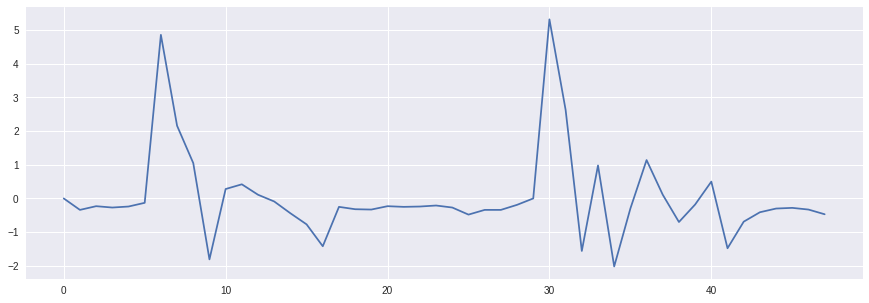

In [91]:
plt.figure(figsize=(15,5))
plt.plot(list_serie_difere[0])

In [92]:
print(list_serie_difere[0])

[ 0.   -0.34 -0.23 -0.27 -0.24 -0.13  4.86  2.16  1.05 -1.81  0.28  0.42
  0.11 -0.09 -0.44 -0.77 -1.42 -0.25 -0.32 -0.33 -0.23 -0.25 -0.24 -0.21
 -0.27 -0.48 -0.34 -0.34 -0.19  0.    5.32  2.63 -1.56  0.98 -2.02 -0.3
  1.14  0.11 -0.7  -0.18  0.5  -1.48 -0.69 -0.41 -0.3  -0.28 -0.33 -0.47]


In [93]:
# Inserindo os autliers
X_auliers = Xte.T.copy()
# Desvio padrao das seres de diferenca
dpdXi = np.std(list_serie_difere, axis=1)
list_index_aut = []
rng = np.random.default_rng()
for i in range(0, 52):
    # Pegando 5% dos index de forma aleatoria de todas as series de teste
    index_aut = rng.choice(range(4, Xte.shape[0]), size=(int(Xte.shape[0] * 0.05)), replace=False)
    for j in index_aut:
        X_auliers[i][j] = X_auliers[i][j] + (5 * dpdXi[i])
    # Quardando as posicoes dos autliers
    list_index_aut.append(index_aut)
    

In [94]:
X_auliers.shape

(52, 72)

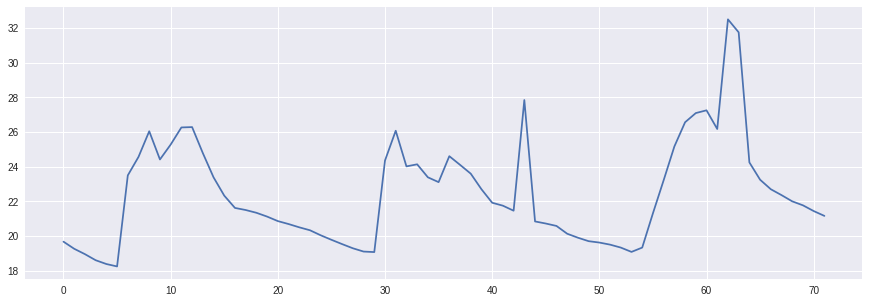

In [95]:
plt.figure(figsize=(15,5))
plt.plot(X_auliers[0])

In [96]:
max(X_auliers[0])

32.51391797176218

In [97]:
# Fazendo a identificacao dos autliers
list_result_aut = []
dados_test = Xte.T.copy()
for i in range(0, 52):
    a = coe_estima_xj[i][0] # Coeficiente a 1x3 da serie i
    b = coe_estima_xj[i][1] # Coeficiente b 1x1 ca serie i
    aut_result = []
    for j in range(4, X_auliers.shape[1]):
        Y = []
        Y.append(dados_test[i][j-1])
        Y.append(dados_test[i][j-2])
        Y.append(dados_test[i][j-3])
        # Estimando o valor cm os coeficentes da serie i
        X_i = np.dot(a.T, Y) + b
        
        if abs(X_auliers[i][j] - X_i) > 4 * dpdXi[i]:
            aut_result.append(j)
    list_result_aut.append(aut_result)

In [98]:
# Caculando os FPs e FNs
list_vp = []
list_vn = []
list_fp = []
list_fn = []
for i in range(0, 52):
    vp = 0
    fp = 0
    for j in range(0, len(list_result_aut[i])):
        result_aut = list_result_aut[i][j]       
        if result_aut in list(list_index_aut[i]):
            vp += 1
            
        if result_aut not in list(list_index_aut[i]):
            fp += 1
    vn = len(list_index_aut[i]) - fp      
    fn = len(list_index_aut[i]) - vp 
    list_vp.append(vp)
    list_vn.append(vn)
    list_fp.append(fp)
    list_fn.append(fn)       

In [99]:
print("Verdadeiros Positivo: ", list_vp)
print("Verdadeiro Negativos: ", list_vn)
print("Falsos Positivos: ", list_fp)
print("Falsos Negativos: ", list_fn)

Verdadeiros Positivo:  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3]
Verdadeiro Negativos:  [3, 2, 1, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Falsos Positivos:  [0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Falsos Negativos:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]


In [101]:
dados_aut_txt = np.array([list_fp, list_fn])
np.savetxt('resultados/2.5/2.4/estima_autliers.txt', dados_aut_txt.T, fmt='%4.f', delimiter='&')